# Problem 9 - HW-FE570 Midterm

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

## Define parameters

In [15]:
# Duration
n = 252

# Define the coefficients:
omega = 0.0149
alpha = 0.0923
beta = 0.8952

# Number of simulations to run:
n_sim = 1000

## Necessary functions for simulation

In [16]:
def v_inf(omega, alpha, beta):
    return omega/(1-alpha-beta)

def simulate_garch(omega, alpha, beta, n ,seed=1):
    
    np.random.seed(seed)
    # Generate the random shocks
    w = np.random.normal(size = n)
    sigma_sq = np.zeros_like(w)
    #
    # Generate the GARCH process:
    # Use first sigma to be equal to v_inf
    sigma_sq[0] = v_inf(omega, alpha,beta)
    
    eps_t = np.array(np.sqrt(sigma_sq[0]) * w[0], ndmin = 1)
    for j in range(1, n):
        sigma_sq[j] = omega + alpha * (eps_t[j-1])**2 + beta * sigma_sq[j-1]
        eps_t = np.append(eps_t, np.sqrt(sigma_sq[j]) * w[j])
        
    return eps_t, sigma_sq

In [17]:
v_inf_baseline = v_inf(omega, alpha, beta)
print("v_inf baseline: %.2f" % v_inf_baseline)

v_inf baseline: 1.19


In [18]:
%%time
list_sims = []
list_sigmas = []
for seed in range(n_sim):
    r, sigmas = simulate_garch(omega, alpha, beta, n, seed=seed)
    list_sims.append(r)
    list_sigmas.append(sigmas)

Wall time: 5.67 s


## Plot

In [19]:
sim_df = pd.DataFrame(list_sims)
sigmas_df = pd.DataFrame(list_sigmas)

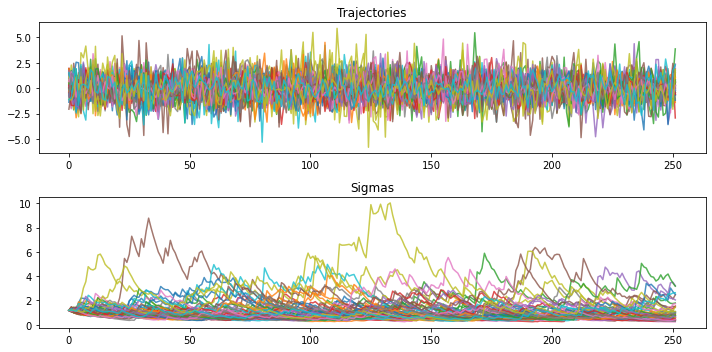

In [20]:
# Plot 50 simulations
fig, ax = plt.subplots(figsize=(10,5), ncols=1, nrows=2)
sim_df.iloc[:50].T.plot(legend=False, alpha=0.8, ax=ax[0], title='Trajectories')
sigmas_df.iloc[:50].T.plot(legend=False, alpha=0.8, ax=ax[1], title='Sigmas')
plt.tight_layout()
plt.show()

### Variance - from the $\sigma^2$ table
As the histogram below shows, the theoretical and experimental values agree beautifully, at less than half a standard deviation from each other.

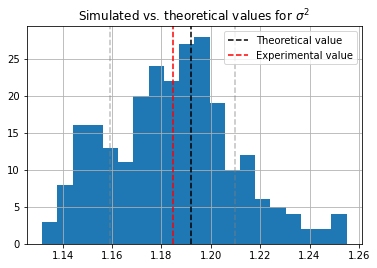

In [21]:
sigmas_df.mean().hist(bins=20)

# theoretical values
plt.axvline(v_inf_baseline, c='black', ls='--', label='Theoretical value')

# experimental values
exp_mean = sigmas_df.mean().mean()
exp_std =  sigmas_df.mean().std()
plt.axvline(exp_mean, c='red', ls='--', label='Experimental value')
plt.axvline(exp_mean+exp_std, c='gray', ls='--', alpha=0.5)
plt.axvline(exp_mean-exp_std, c='gray', ls='--', alpha=0.5)
plt.legend()
plt.title("Simulated vs. theoretical values for $\sigma^2$")
plt.show()

### Variance - from the $\epsilon_t$ table

Using here that $E[\epsilon_t^2] = E[\sigma_t^2]$, this simulation should also agree with the theoretical value:

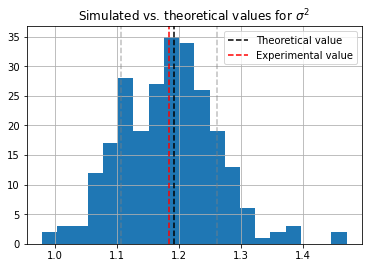

In [22]:
et2 = (sim_df**2)
et2.mean().hist(bins=20)

# theoretical values
plt.axvline(v_inf_baseline, c='black', ls='--', label='Theoretical value')

# experimental values
exp_mean = et2.mean().mean()
exp_std =  et2.mean().std()
plt.axvline(exp_mean, c='red', ls='--', label='Experimental value')
plt.axvline(exp_mean+exp_std, c='gray', ls='--', alpha=0.5)
plt.axvline(exp_mean-exp_std, c='gray', ls='--', alpha=0.5)
plt.legend()
plt.title("Simulated vs. theoretical values for $\sigma^2$")
plt.show()

### Trajectory $\varepsilon_t$

Again we have agreement: $E[\epsilon_t] = 0$

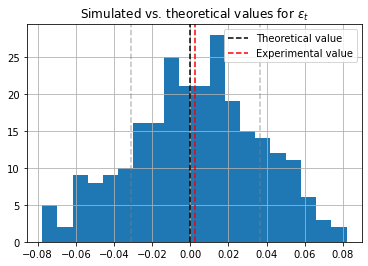

In [23]:
sim_df.mean().hist(bins=20)

# theoretical values
plt.axvline(0, c='black', ls='--', label='Theoretical value')

# experimental values
exp_mean = sim_df.mean().mean()
exp_std =  sim_df.mean().std()
plt.axvline(exp_mean, c='red', ls='--', label='Experimental value')
plt.axvline(exp_mean+exp_std, c='gray', ls='--', alpha=0.5)
plt.axvline(exp_mean-exp_std, c='gray', ls='--', alpha=0.5)
plt.title("Simulated vs. theoretical values for $\epsilon_t$")
plt.legend()
plt.show()


### Kurtosis

Match here is a little tighter, and requires us to used the median instead of the mean, but there is agreement within 1 standard deviation too between the theoretical baseline and the simulation results.

In [24]:
# Baseline:
kurt_base = omega **2 * (1+alpha+beta)/((1-alpha-beta)*(1-(alpha+beta)**2 - 2*alpha**2))
print("Theoretical kurtosis: %.2f" % kurt_base)

Theoretical kurtosis: 4.52


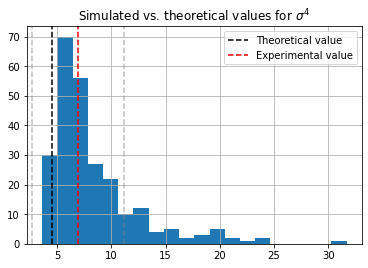

In [25]:
kurt_df = (sim_df**4)
kurt_df.mean().hist(bins=20)

# theoretical values
plt.axvline(kurt_base, c='black', ls='--', label='Theoretical value')

# experimental values
exp_mean = kurt_df.mean().median()  # we use median here since this curve is not normal
exp_std =  kurt_df.mean().std()
plt.axvline(exp_mean, c='red', ls='--', label='Experimental value')
plt.axvline(exp_mean+exp_std, c='gray', ls='--', alpha=0.5)
plt.axvline(exp_mean-exp_std, c='gray', ls='--', alpha=0.5)
plt.legend()
plt.title("Simulated vs. theoretical values for $\sigma^4$")
plt.show()